In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from torchviz import make_dot

from fastcore.test import test_eq
from fastcore.basics import first
from fastai.data.external import untar_data, URLs
from fastai.tabular.data import TabularDataLoaders
from fastai.tabular.core import Categorify, FillMissing
from fastai.data.transforms import Normalize
from tsai.all import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('fetal_health.csv')

<AxesSubplot:>

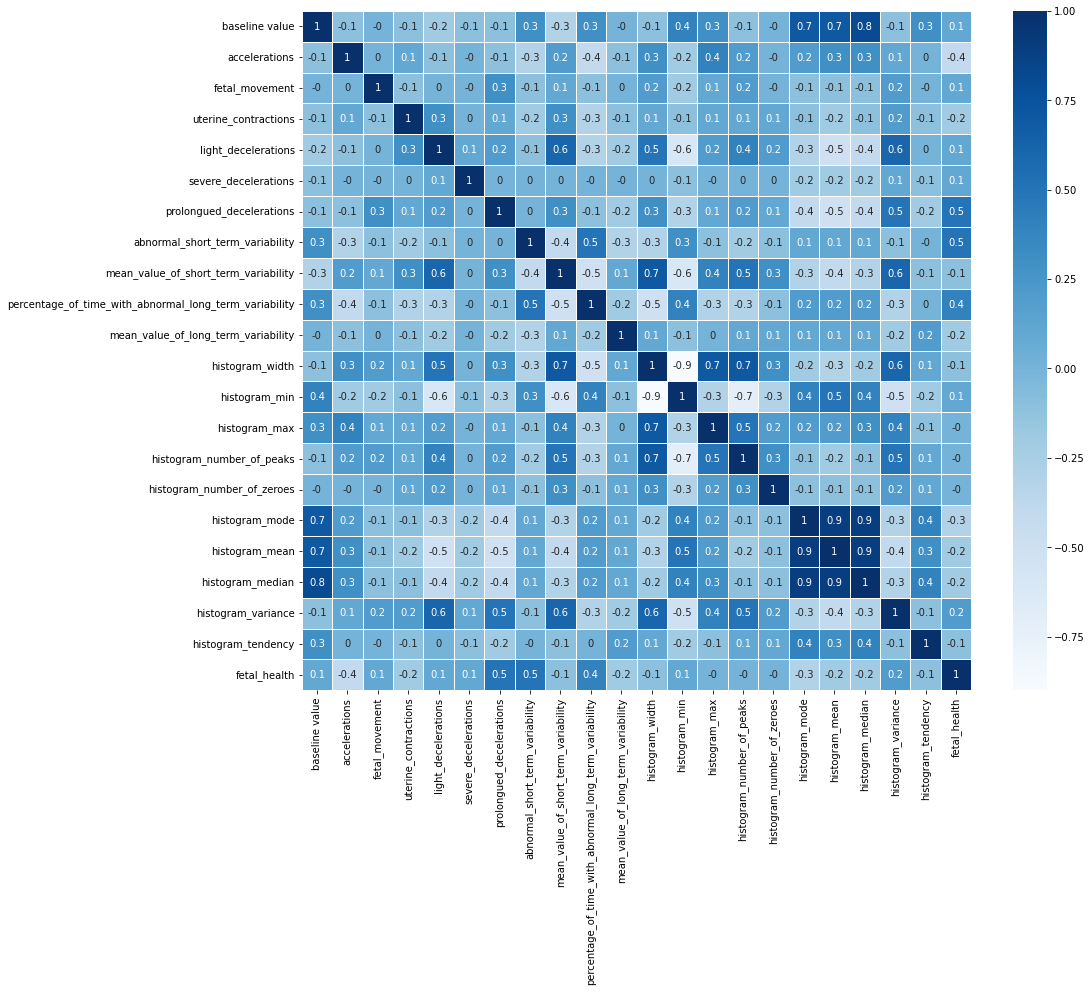

In [5]:
corr = data.corr()
f, ax = plt.subplots(figsize=(15,12.5))
cmap = sns.diverging_palette(150, 240, s=120, l=55, as_cmap=True)
sns.heatmap(round(corr, 1), annot=True,cmap='Blues',linewidth=0.9)

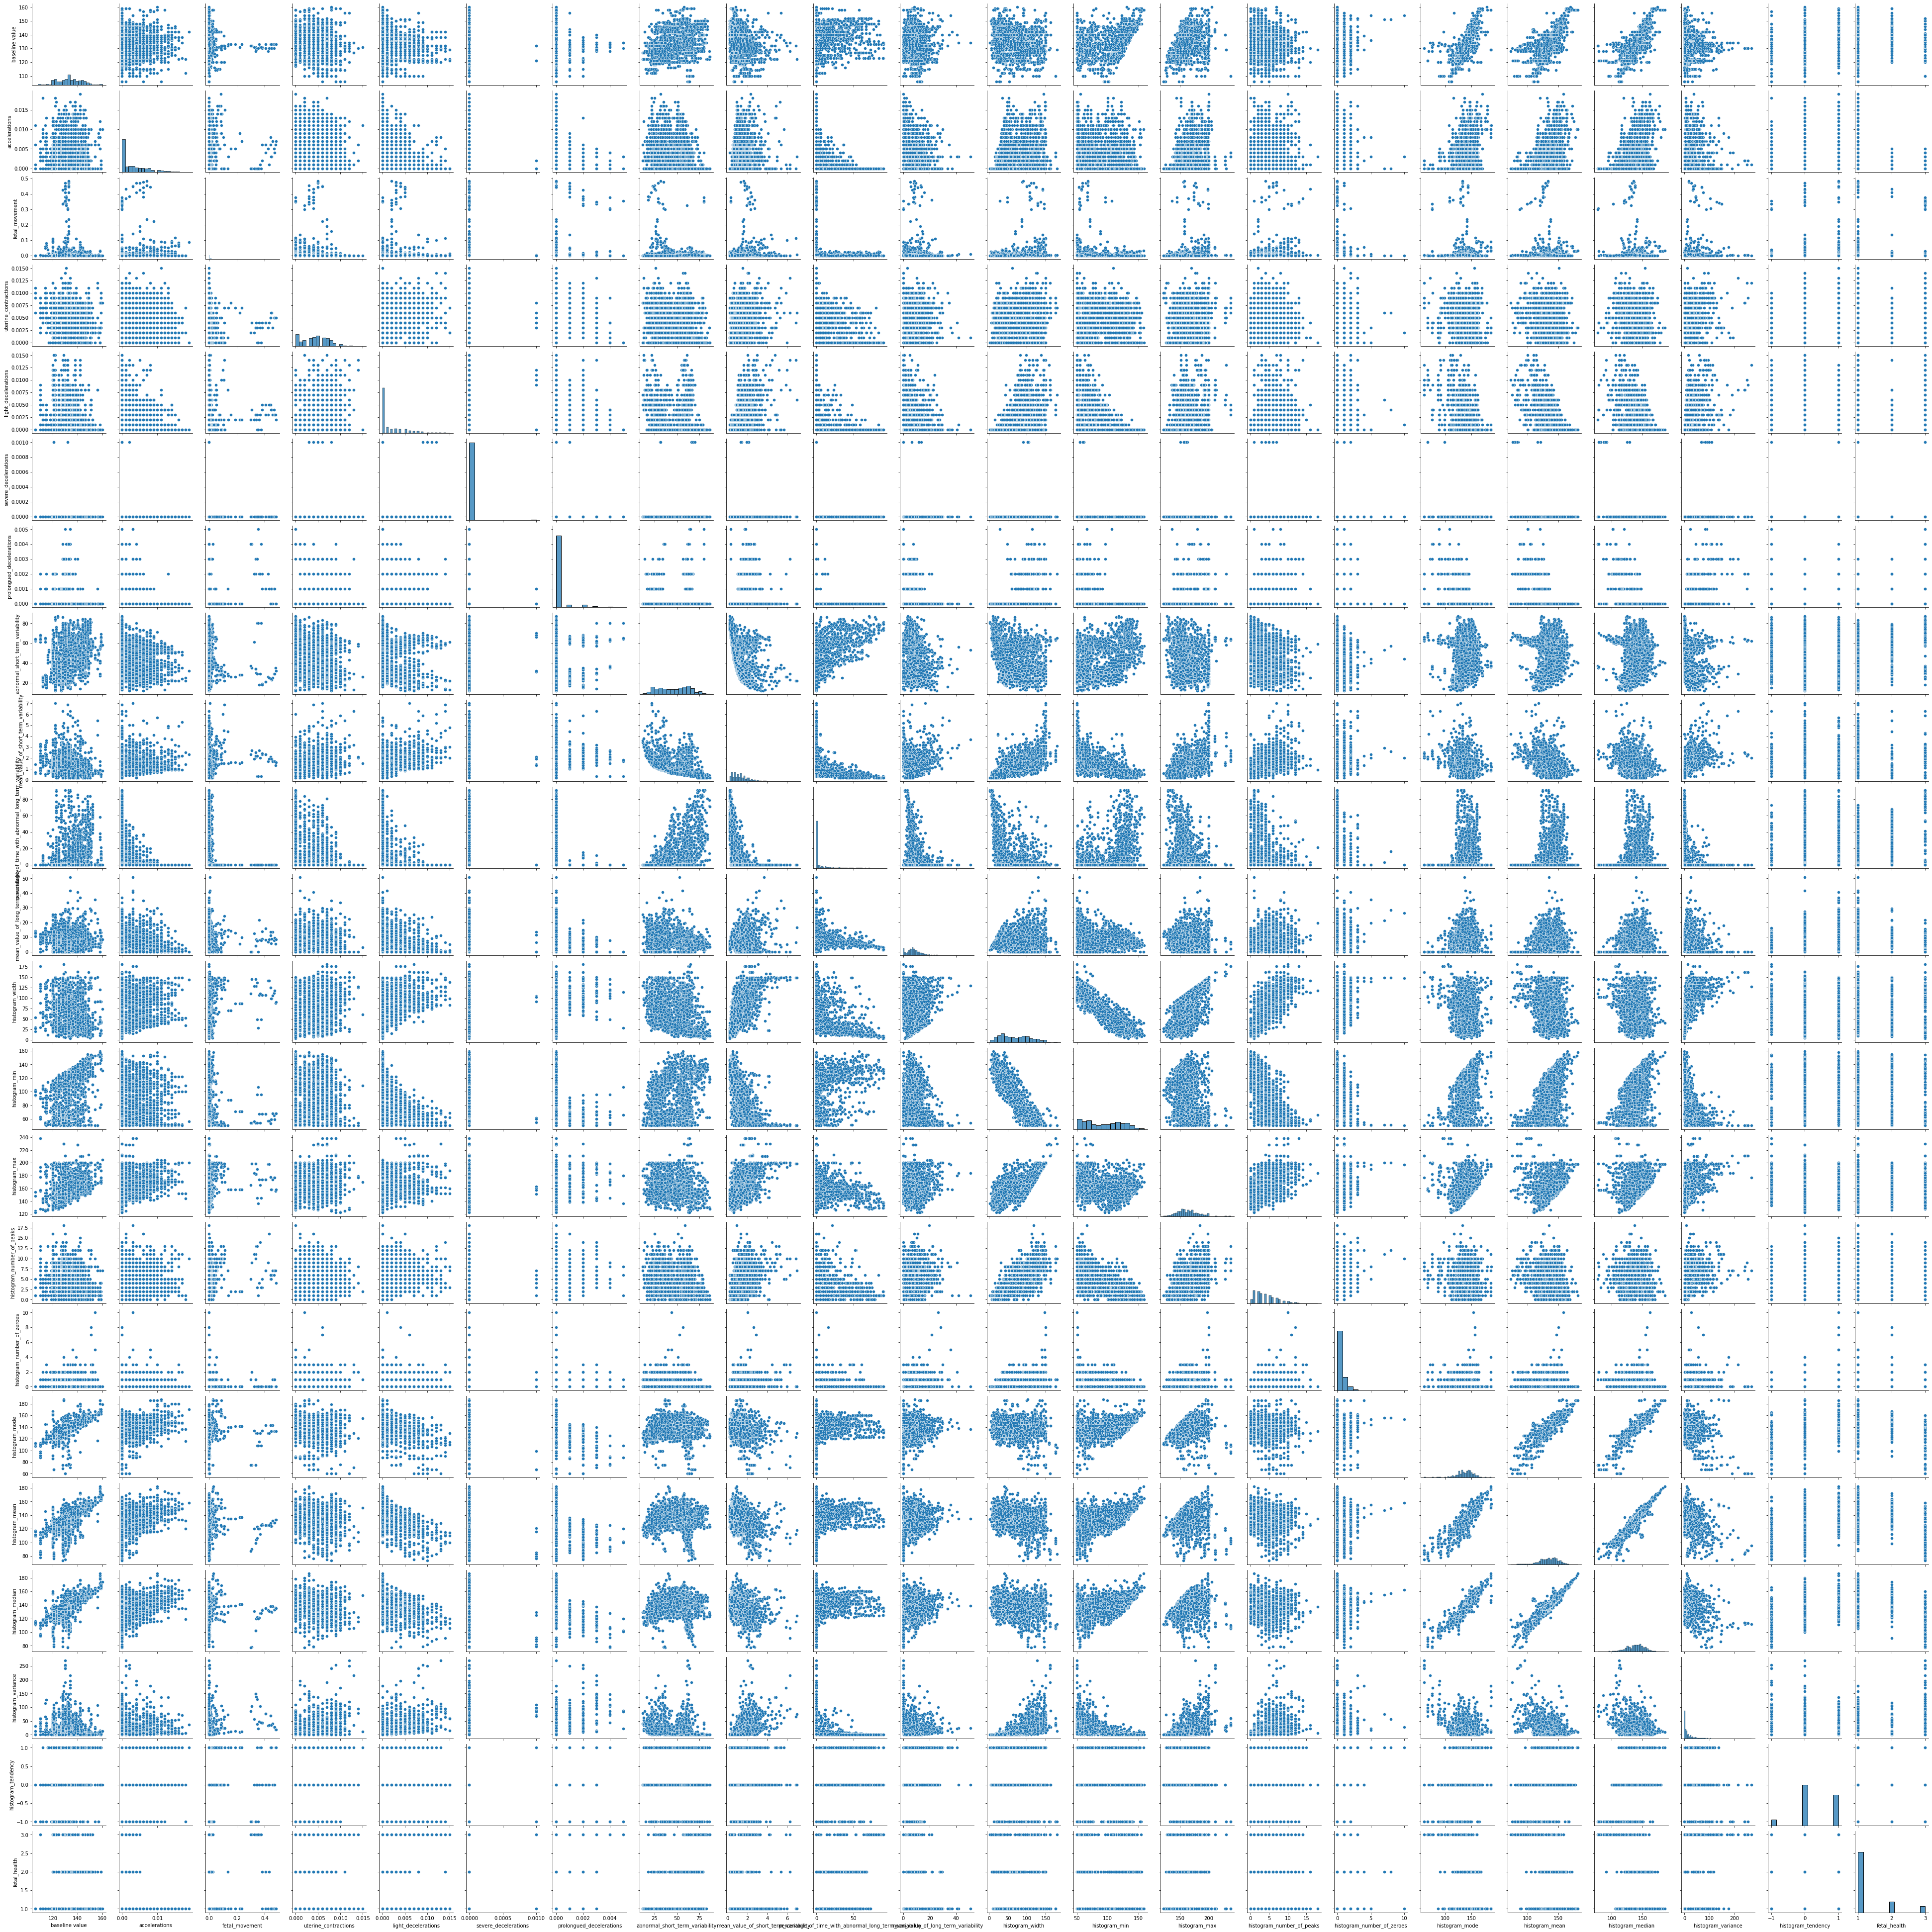

In [104]:
sns.pairplot(data)

In [6]:
data.fetal_health = data.fetal_health.astype(str)

dls = TabularDataLoaders.from_df(data, path=".", y_names="fetal_health",
    cat_names = ['severe_decelerations', 'histogram_tendency'],
    cont_names = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance'],
    procs = [Categorify, FillMissing, Normalize])

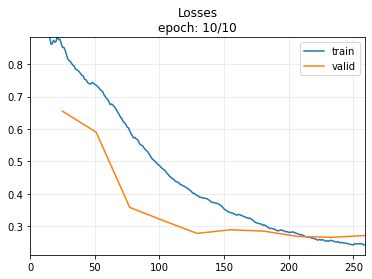

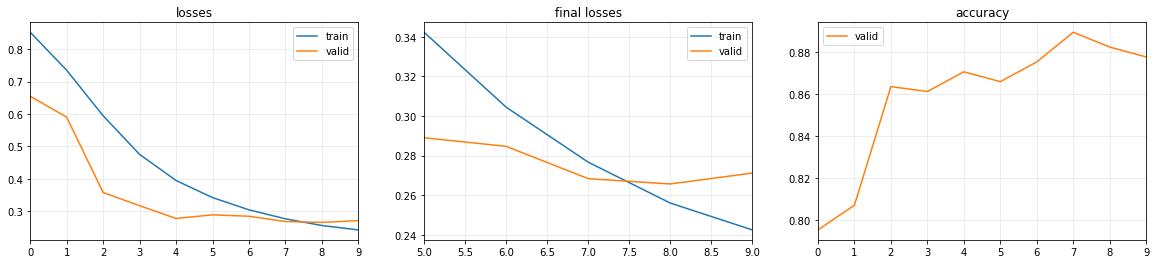

In [240]:
model = GatedTabTransformer(dls.classes, dls.cont_names, dls.c, mlp_d_model=128, mlp_d_ffn=256, mlp_layers=6)
learn = Learner(dls, model, cbs=ShowGraph(), loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(10, 1e-3)

# Model Visualisation

In [8]:
batch = next(iter(dls.train))
model = GatedTabTransformer(dls.classes, dls.cont_names, dls.c, mlp_layers=1, n_layers=1)
make_dot(model(batch[0], batch[1]), params=dict(list(model.named_parameters()))).render("GatedTabTransformer-graph", format="png")

'GatedTabTransformer-graph.png'

<img src="GatedTabTransformer-graph.png"/>